# **PREDIKSI SISA UMUR PAKAI BATERAI MENGGUNAKAN LINEAR REGRESI DAN DEEP LEARNING**

# Data Collection

The HNEI Battery Dataset, sourced from Kaggle, provides detailed battery cycling data for lithium-ion batteries under various conditions. It includes charge and discharge profiles, voltage, current, and temperature readings, enabling comprehensive analysis of battery behaviour. This dataset is widely used for research in battery health estimation and performance prediction.

In [2]:
# Data were collected from https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul/data
import pandas as pd
df = pd.read_csv('Battery_RUL.csv')
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


# Data Understanding & Removing Outlier

At this stage, data is reviewed for its structure, including the number of rows and columns using df.shape, providing an overview of the dataset's size. Detailed information about data types and memory usage is examined using df.info, ensuring that the data types align with the intended analysis. Summary statistics of each numerical column are explored with df.describe to understand the data's central tendency, dispersion, and range. These steps are essential for identifying any irregularities and preparing the data for further analysis.



In [3]:
# Displays the dataset's dimensions, helping identify the number of rows and columns to understand its size.
df.shape

(15064, 9)

In [4]:
# Provides an overview of the dataset, including column data types and missing values, aiding in initial data assessment.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [5]:
# Summarises statistical properties of numerical columns, useful for detecting potential outliers and understanding data distribution.
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


## Missing value check

At this stage, the dataset is checked for missing values using df.isnull to ensure that no data points are incomplete. This step is crucial to maintain the integrity and quality of the data for further analysis.

In [6]:
# Identifies missing values in the dataset, essential for addressing data quality issues.
print(df.isnull().sum())


Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64


## Removing Outliers

At this stage, boxplots are utilised to visualise data distributions and identify potential outliers. Outliers are then removed using the Interquartile Range (IQR) method to ensure the dataset's quality and reliability for further analysis.

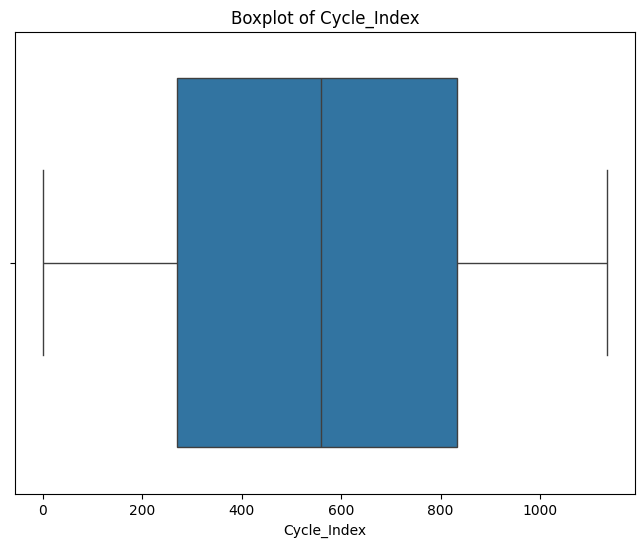

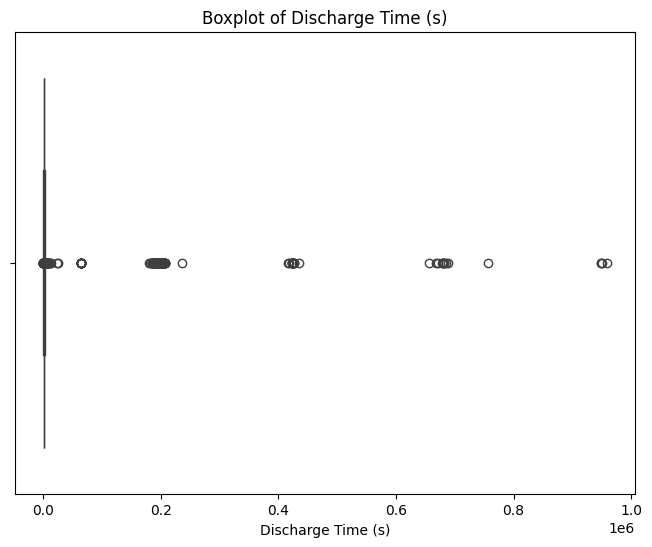

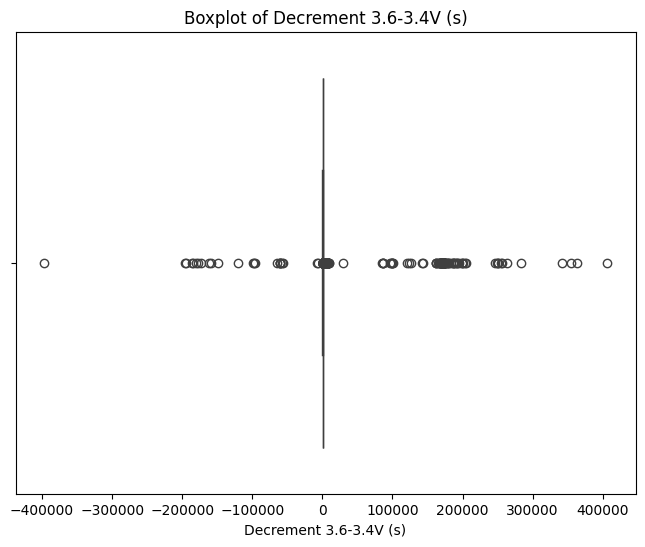

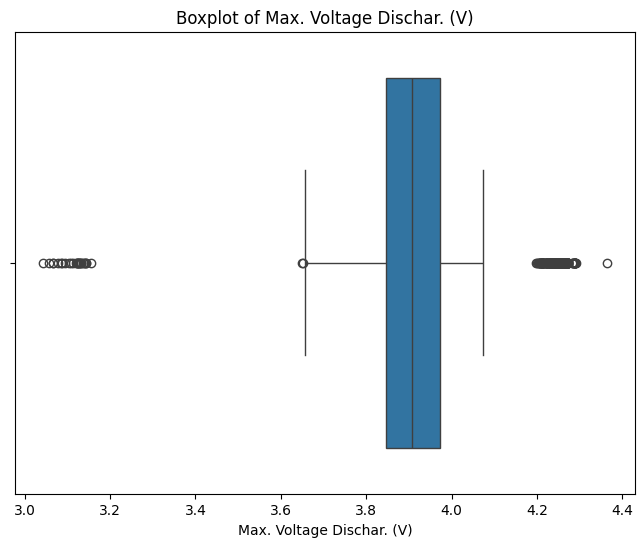

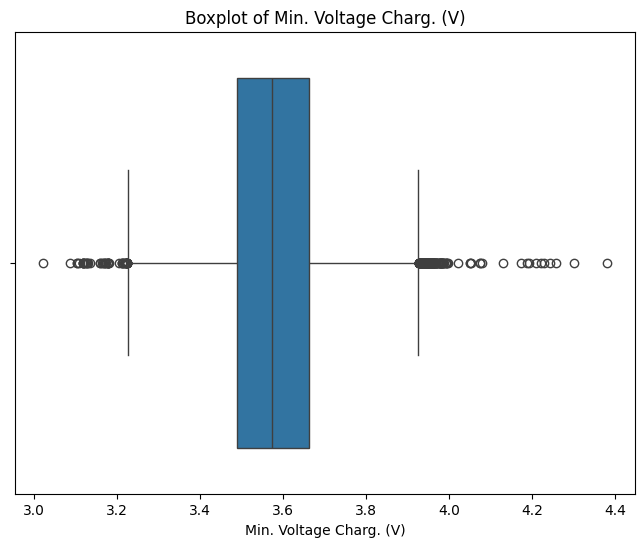

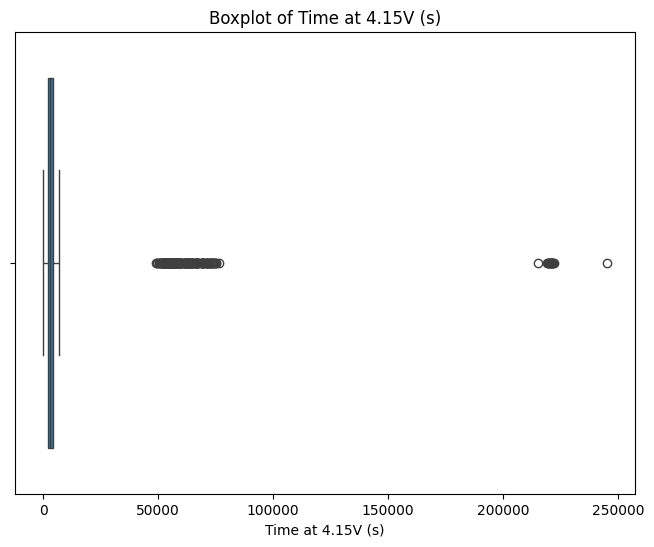

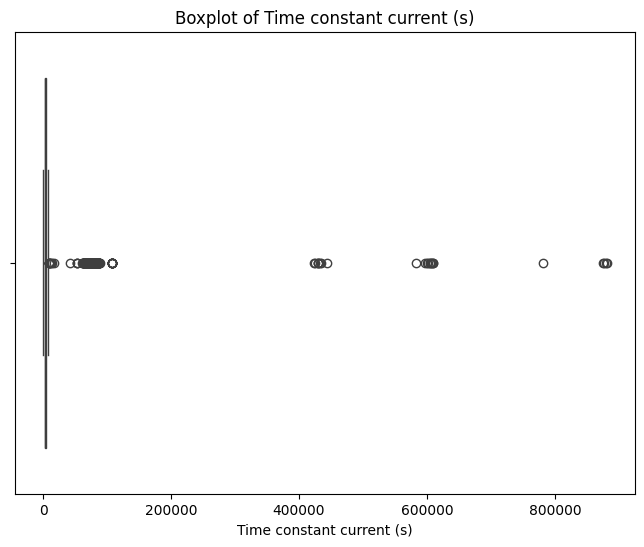

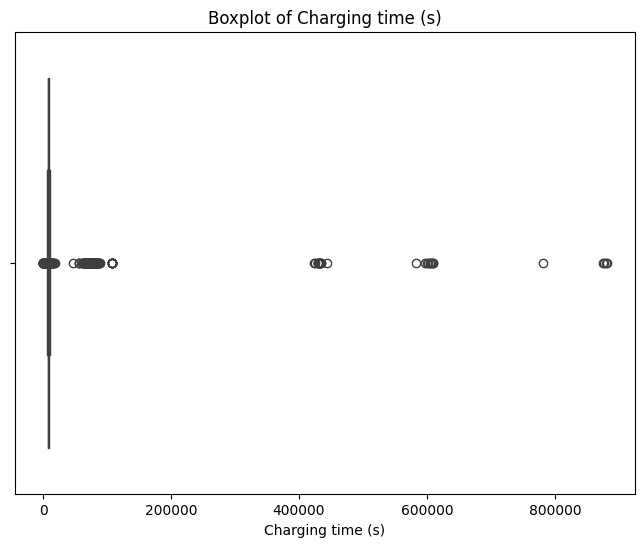

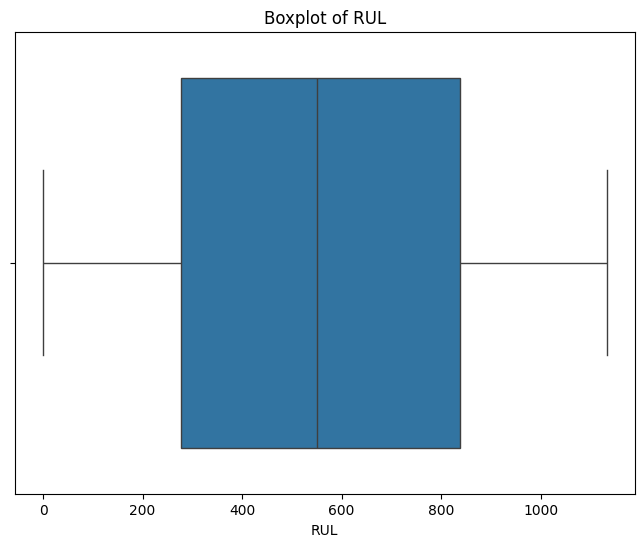

In [7]:
# prompt: plot boxplot for all features df
# Visualises data distribution and highlights outliers in each variable.

import matplotlib.pyplot as plt
import seaborn as sns


# Create box plots for all numerical features
numerical_features = df.select_dtypes(include=['number']) #Select numerical features only
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [8]:
# Removing Outliers
# Eliminates extreme values by filtering data beyond the interquartile range (IQR).
for col in df.columns:
    if df[col].dtype != 'object':  # Exclude non-numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
16,18.0,2259.46,883.199000,4.042,3.373,5181.377,6161.38,9310.98,1095
17,19.0,2256.61,878.400000,4.042,3.374,5181.375,6154.37,9296.64,1094
18,20.0,2252.83,873.601000,4.043,3.374,5174.334,6147.33,9243.58,1093
19,21.0,2250.62,868.801000,4.044,3.374,5160.289,6140.29,9245.53,1092
20,22.0,2248.60,868.797000,4.044,3.375,5160.321,6133.34,9248.32,1091
...,...,...,...,...,...,...,...,...,...
15058,1107.0,773.00,180.480000,3.774,3.742,922.712,1412.31,6659.62,5
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2


## Univariate Analysis: Numerical Features

At this stage, histograms are used to examine the distribution of data, providing insights into its shape, spread, and potential irregularities, ensuring the dataset's readiness for further analysis.

The histograms display the distribution of various battery parameters, such as "Cycle Index," "Discharge Time," and "Charging Time." Most variables exhibit diverse patterns, including skewed, uniform, and normal-like distributions, indicating variations in data characteristics that may impact modelling approaches.


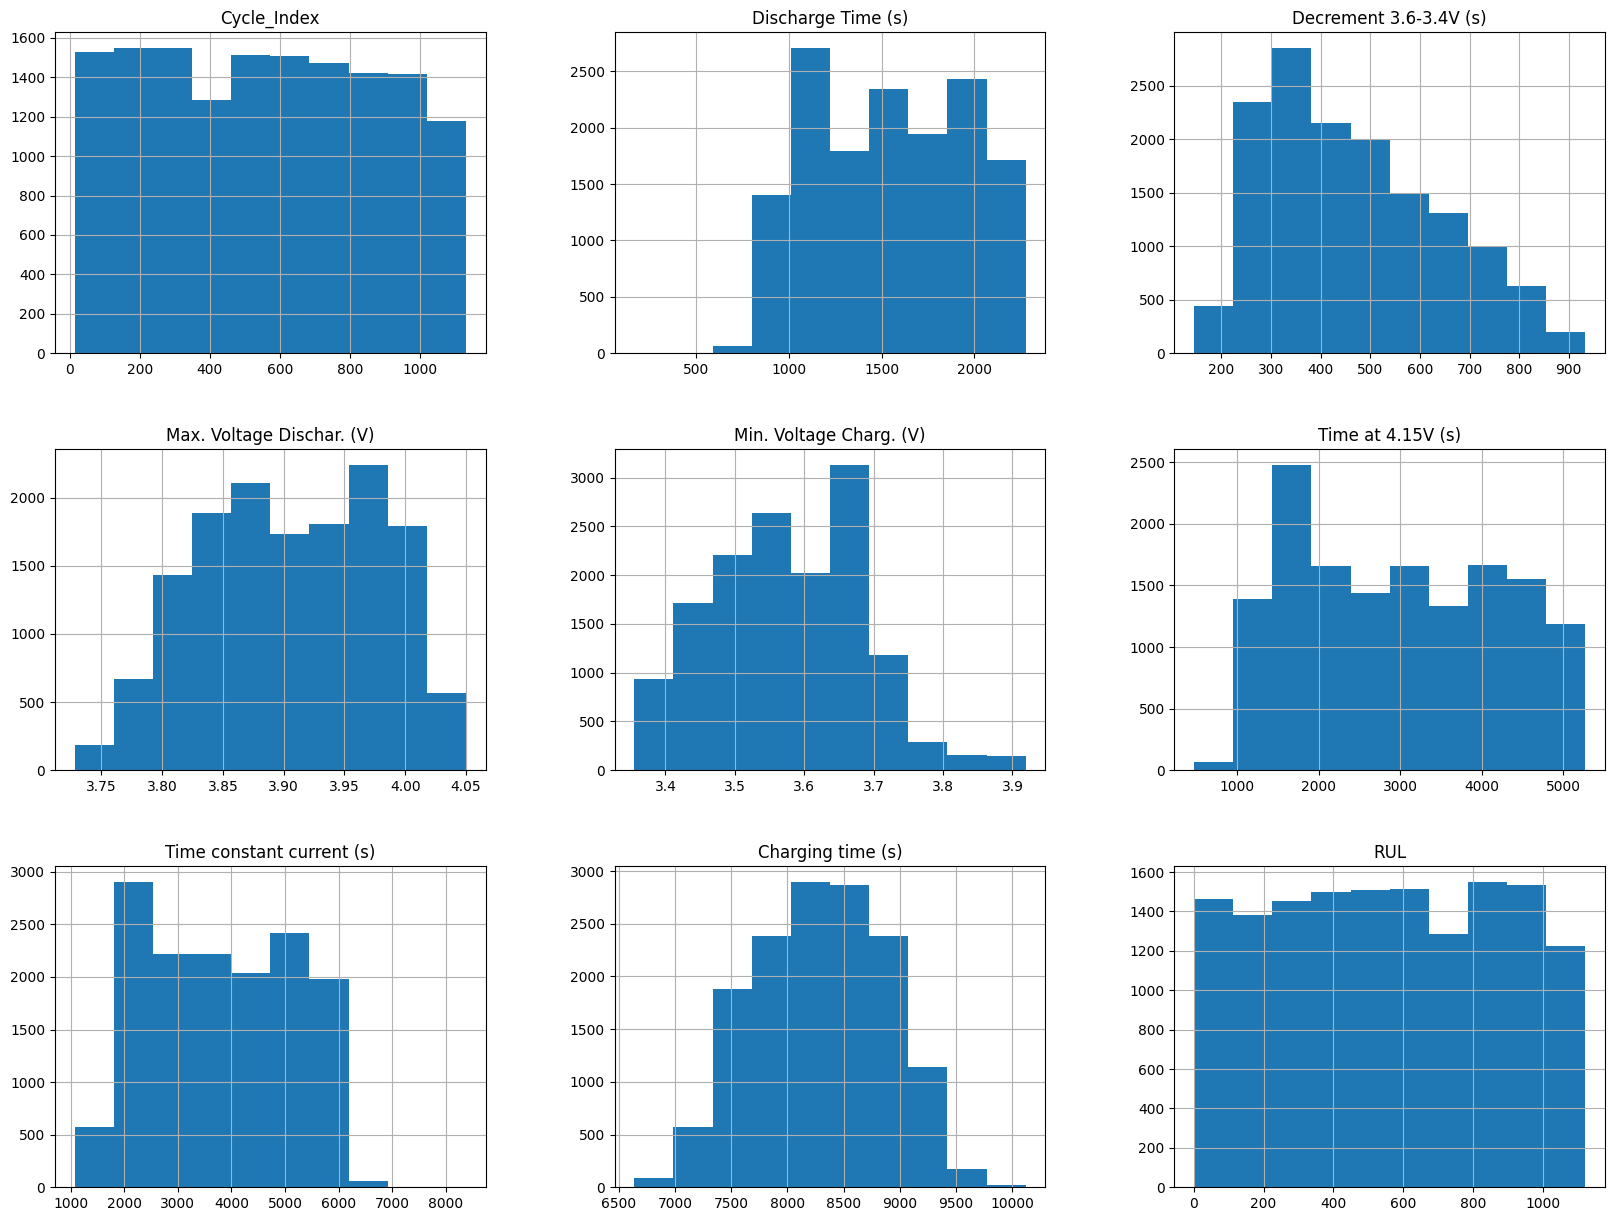

In [9]:
# prompt: df histogram
# Displays the distribution of numerical columns to understand data variability and skewness.

df.hist(figsize=(20, 15))
plt.show()

## Multivariate Analysis: Numerical Features

At this stage, a pair plot is used to visualise the relationships between different variables and identify potential patterns, trends, or anomalies in the data. The scatter plots in the matrix reveal correlations and distributions for each variable pair, while the diagonal histograms display the individual variable distributions. This comprehensive overview aids in ensuring the data's quality and suitability for further analysis.

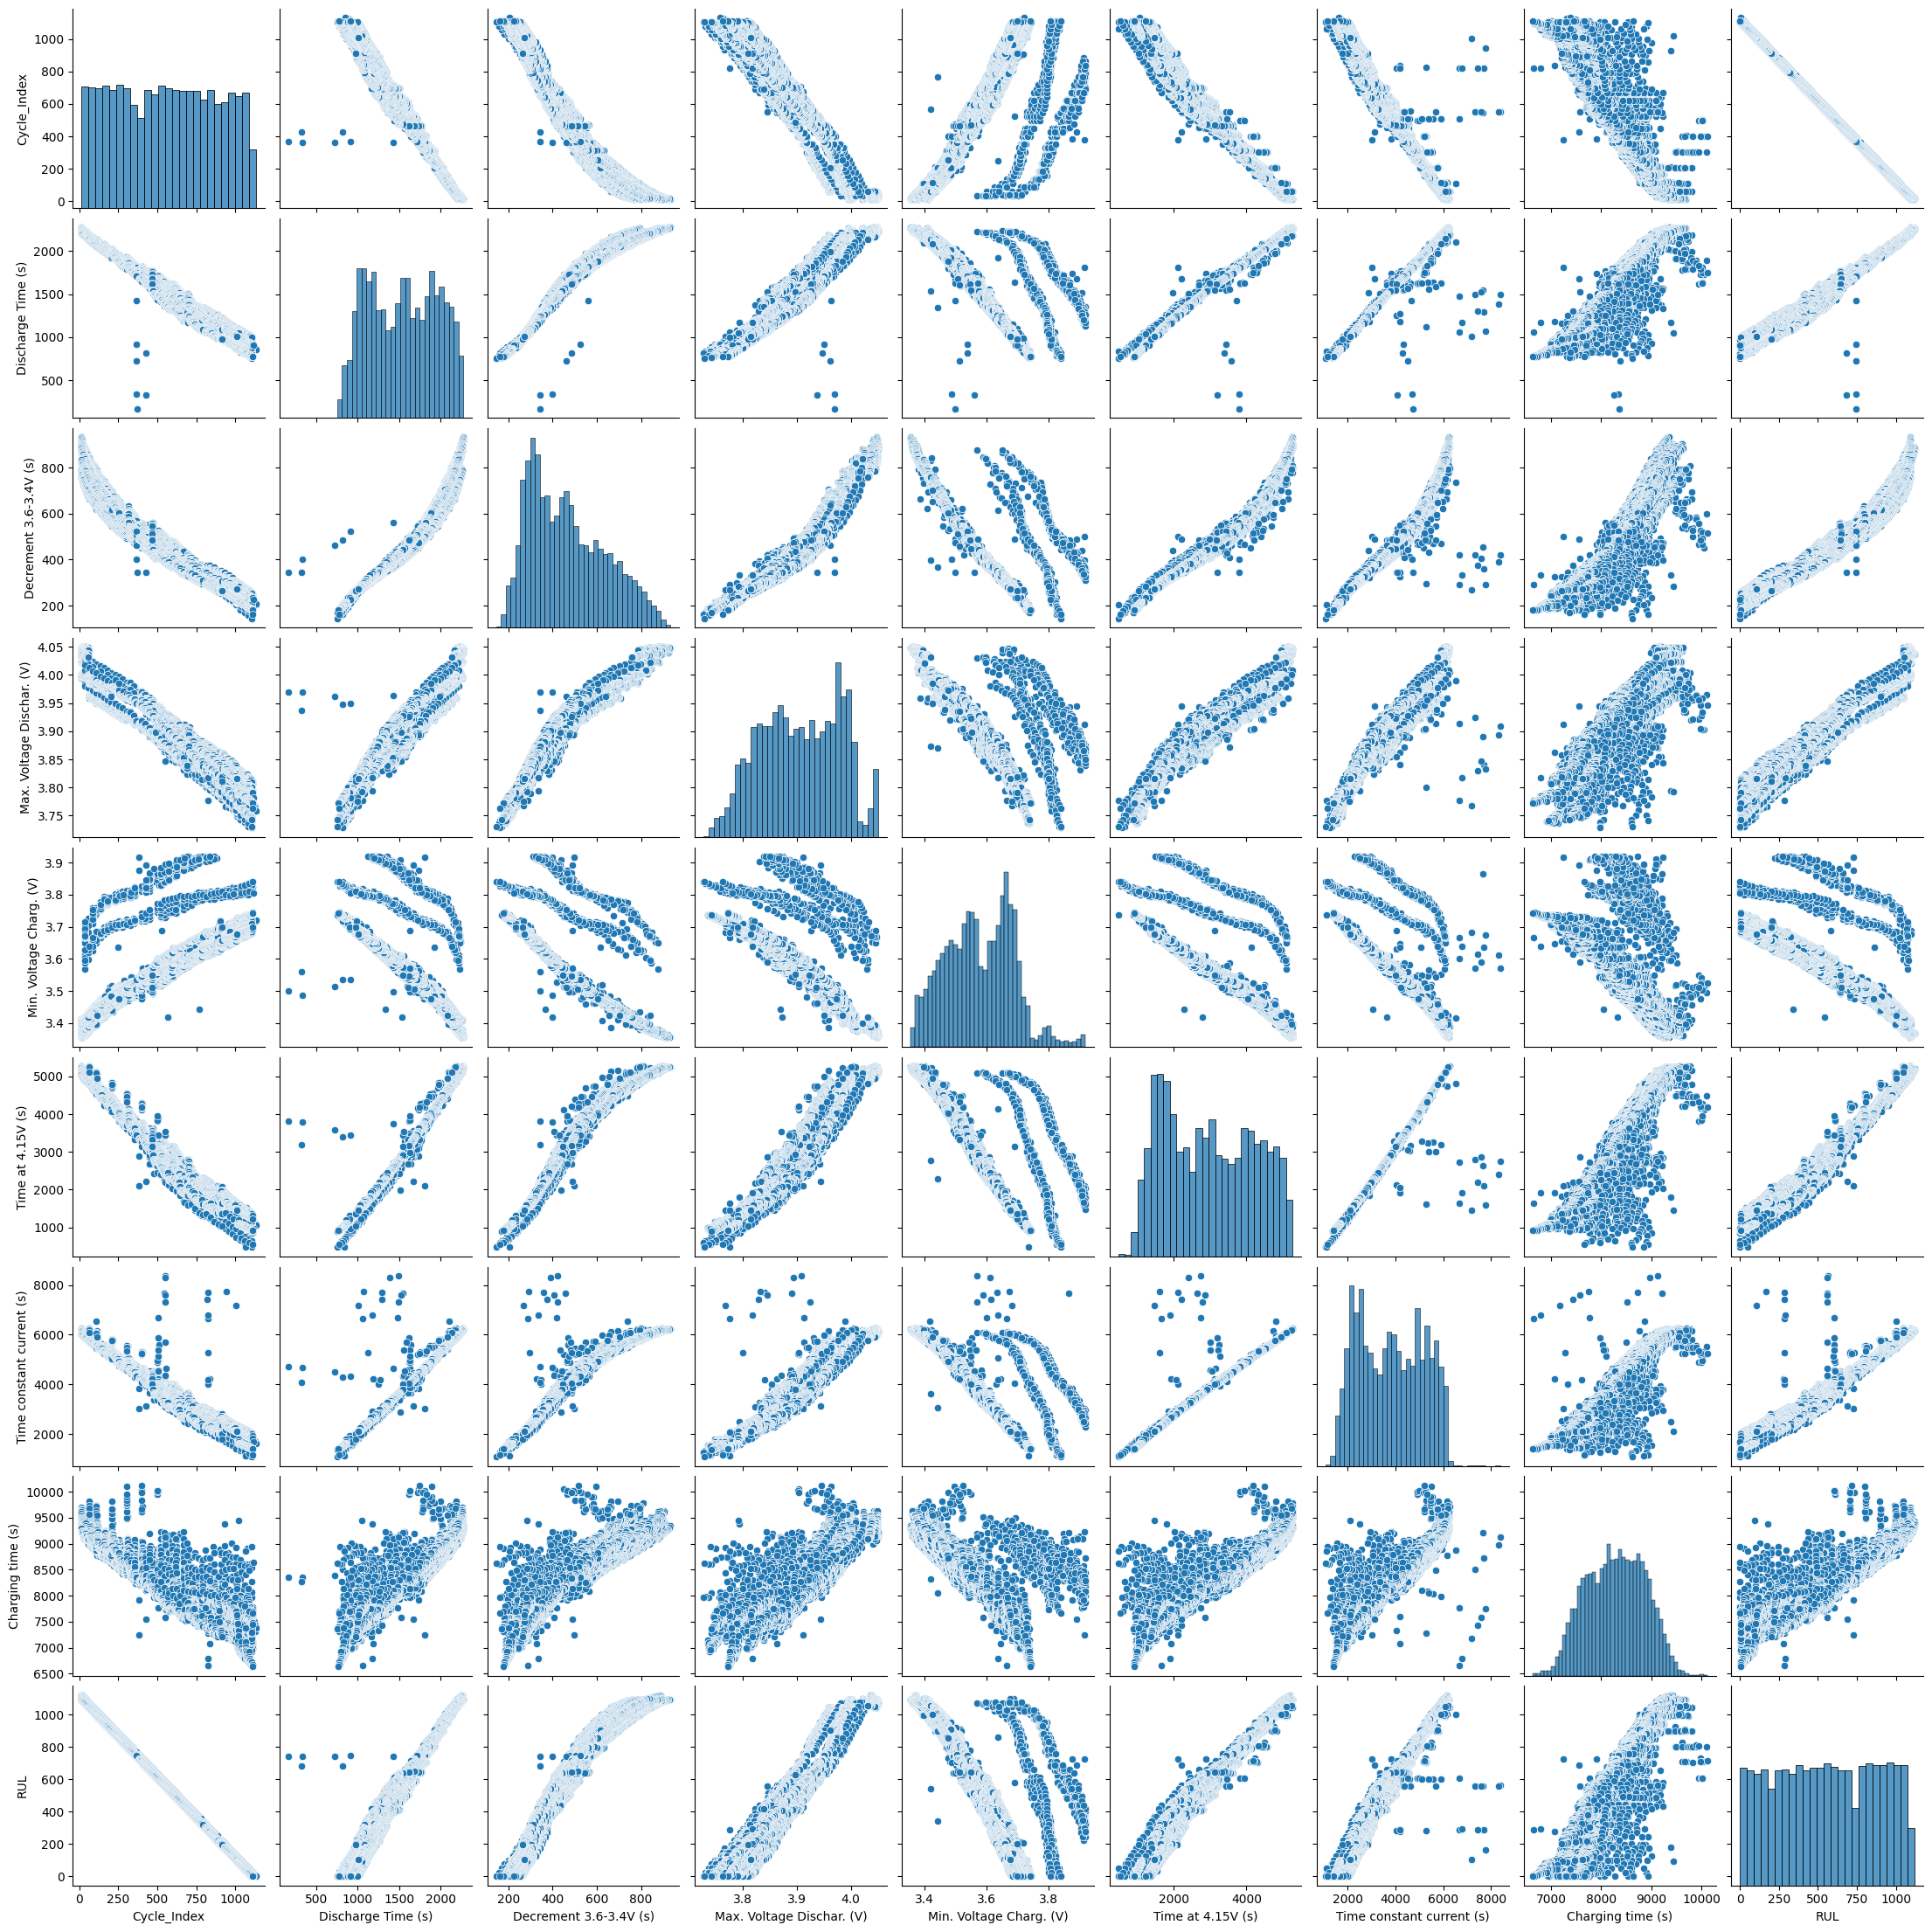

In [10]:
# prompt: df pairplot
# Examines pairwise relationships between features, aiding in the detection of trends and correlations.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot
sns.pairplot(df)
plt.show()

## Correlation Check

At this stage, a heatmap is utilised to visualise the correlation matrix between variables, highlighting the strength and direction of relationships. The colour intensity provides an intuitive representation, with red indicating strong positive correlations and blue representing strong negative correlations. Notably, each feature exhibits a very high correlation with the RUL (Remaining Useful Life), making it evident that these variables significantly influence the target outcome. This analysis is crucial for identifying redundant features, multicollinearity, or patterns that can guide data preprocessing and model development.

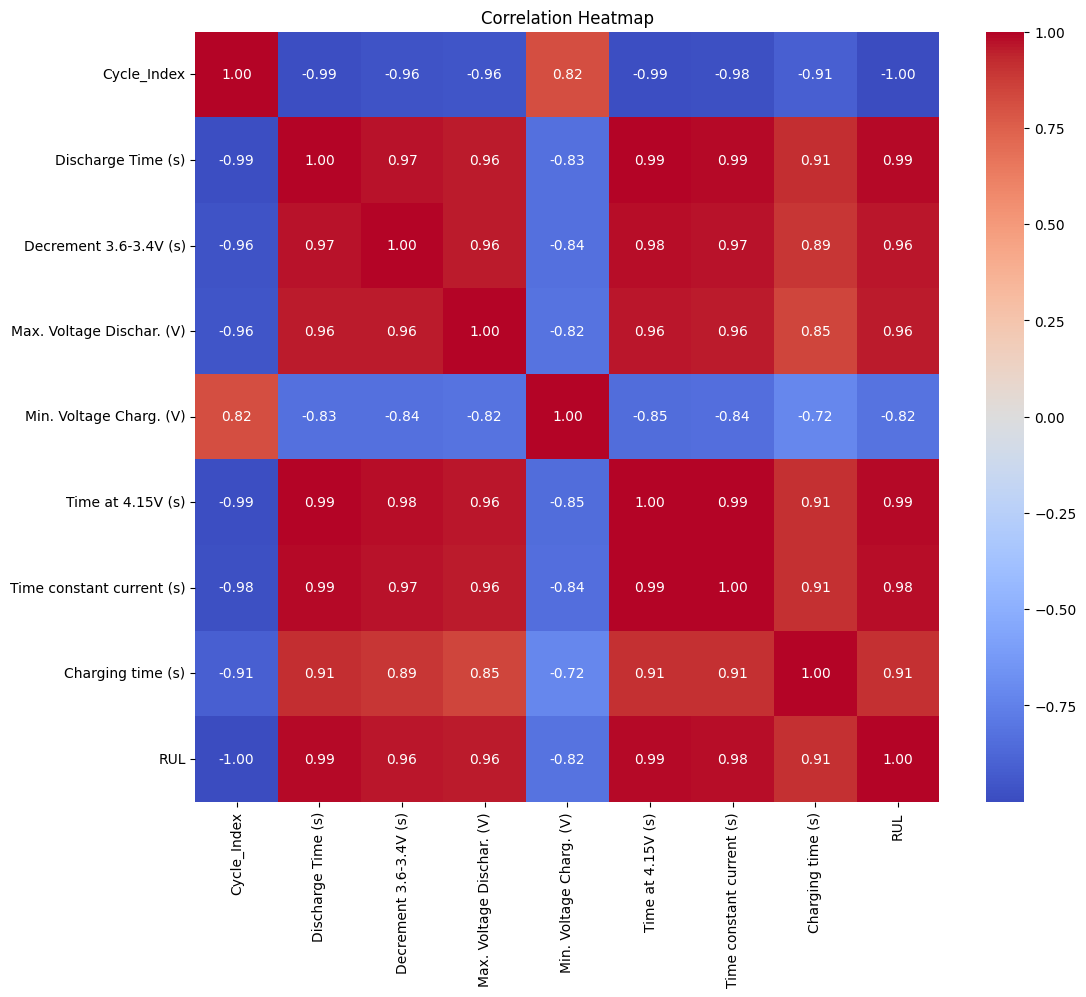

In [11]:
# prompt: df heatmap
# Highlights correlations between variables through a colour-coded matrix, providing insight into feature interdependencies.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f") # Use a different colormap if you prefer
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Calculate the correlation between each feature and RUL
correlation_matrix = df.corr()
rul_correlation = correlation_matrix['RUL'].drop('RUL') # Remove self-correlation

rul_correlation

,RUL
Cycle_Index,-0.999752
Discharge Time (s),0.986580
Decrement 3.6-3.4V (s),0.964465
Max. Voltage Dischar. (V),0.959790
Min. Voltage Charg. (V),-0.819565
Time at 4.15V (s),0.986262
Time constant current (s),0.983094
Charging time (s),0.908739


# Data Preparation

## Splitting Dataset

At this stage, the dataset is divided into training and testing subsets to ensure reliable model evaluation. The training set, consisting of 80% of the data, is used to train the model, while the remaining 20% serves as the testing set to assess the model's performance on unseen data. This step is essential for validating the model's generalisation capability and preventing overfitting.

In [13]:
# Divides the dataset into training and testing subsets to evaluate model performance on unseen data.

import pandas as pd
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(['RUL', 'Cycle_Index'], axis=1)
y = df['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Now you have X_train, X_test, y_train, and y_test for your model
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11536, 7)
X_test shape: (2885, 7)
y_train shape: (11536,)
y_test shape: (2885,)


## Normalization Data

At this stage, MinMaxScaler() is applied to scale the features of the dataset. This method transforms the data by normalising it to a specified range, typically between 0 and 1. This step ensures that all features contribute equally to the model, improving the performance of algorithms that are sensitive to the scale of the data, such as those based on distance metrics or gradient-based optimisation.

In [14]:
# Normalization Dataset
# Normalises feature values to a specified range, typically [0, 1], to improve model convergence.

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## PCA Transformation

At this stage, Principal Component Analysis (PCA) transformation is applied to reduce the dimensionality of the dataset. PCA identifies the principal components, which are the directions of maximum variance in the data, and projects the data onto a lower-dimensional space while retaining as much variance as possible. This step helps improve the computational efficiency of the model, reduces noise, and can also enhance model performance by eliminating multicollinearity.

In [15]:
# Reduce data dimension using PCA
# Reduces data dimensionality while preserving variance, enhancing computational efficiency and mitigating multicollinearity.



from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
pca = PCA(n_components=0.95)  # Example: Keep 95% of variance

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

X_train_pca shape: (11536, 2)
X_test_pca shape: (2885, 2)


# Modelling

## Modelling using Linear Regression
At this stage, the data is modelled using a **Linear Regression** algorithm. The **LinearRegression()** model from scikit-learn is applied to predict the target variable by establishing a linear relationship between the features and the target. This model is trained using the training dataset, where it learns the optimal coefficients that minimise the error in prediction. Linear regression is a simple and interpretable algorithm, well-suited for problems where the relationship between the variables is expected to be linear. The model is evaluated based on its ability to predict the target variable using metrics such as Mean Squared Error (MSE) or R-squared (R²).

In [16]:
# prompt: Create a linear regression model to estimate y_train and y_test

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(X_train_pca, y_train)

# Make predictions on the training and testing data
y_train_pred_lr = model_lr.predict(X_train_pca)
y_test_pred_lr = model_lr.predict(X_test_pca)



## Modelling using Deep Learning

At this stage, a **Deep Learning** model is implemented using the **Keras** library. The model is built using a **Sequential** architecture, consisting of three layers. The first layer is a **Dense** layer with 64 units and a **ReLU** activation function, which serves as the input layer with the shape matching the number of features in the training data (X_train_pca). The second layer is another **Dense** layer with 32 units and **ReLU** activation, followed by a final output layer with a single unit, suitable for regression tasks.

The model is compiled with the **Adam** optimizer, which is well-known for adapting the learning rate during training, and the **Mean Squared Error (MSE)** loss function, appropriate for regression problems. **Mean Absolute Error (MAE)** is also used as a metric to evaluate the model's performance.

The model is then trained using the training data (X_train_pca, y_train), with 50 epochs and a batch size of 32. A validation split of 20% is used to monitor the model's performance on unseen data during training. This approach allows the model to learn complex patterns in the data while evaluating its generalisation capabilities.

In [17]:
# prompt: Create a deep learning model to estimate y_train and y_test loss rmse

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

# Assuming X_train_pca, X_test_pca, y_train, y_test are defined from previous code

# Define the model
model_dl = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model_dl.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_dl.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 398882.6875 - mae: 547.8359 - val_loss: 235166.7031 - val_mae: 407.3459
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 141346.4844 - mae: 302.8670 - val_loss: 5010.5132 - val_mae: 58.1692
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3798.1240 - mae: 49.4042 - val_loss: 2969.1367 - val_mae: 42.3728
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2752.2891 - mae: 41.2323 - val_loss: 2813.8669 - val_mae: 41.1861
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2664.9304 - mae: 40.2223 - val_loss: 2760.9517 - val_mae: 40.7904
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2574.4561 - mae: 39.6674 - val_loss: 2723.4172 - val_mae: 40.4069
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2555.8396 - mae: 39.4615 - val_loss: 2694.5854 - val_mae: 40.0987
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2542.2468 - mae: 39.3369 - val_loss: 2674.6223 - 

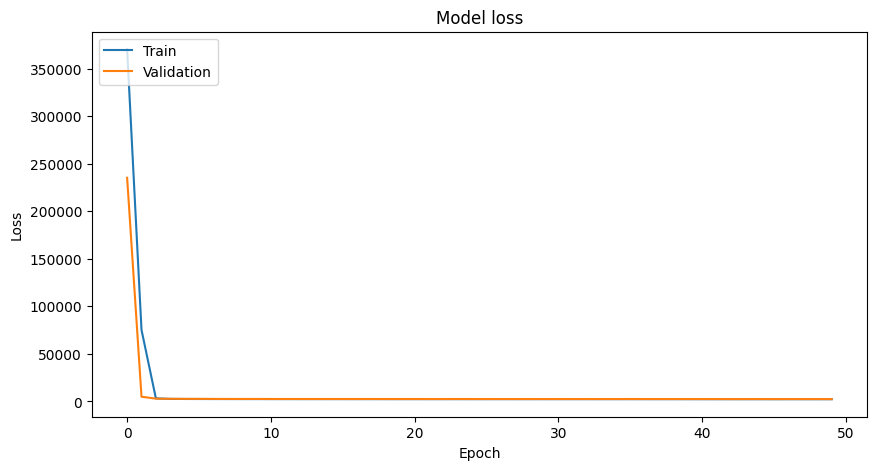

In [18]:
# Plot training & validation loss values
# the plot shows that the model can reach convergen under 10 epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Model Evaluation

## Model evaluation for LR
At this stage, the performance of the Linear Regression model is evaluated on both the training and testing datasets. The Root Mean Squared Error (RMSE) and R-squared (R²) are the key metrics used for assessment.

For the training data, the model achieved an RMSE of 51.8579, indicating that, on average, the model's predictions deviate from the true values by approximately 51.86 units. The R-squared value of 0.9735 suggests that about 97.35% of the variance in the target variable (e.g., Remaining Useful Life, RUL) is explained by the model, demonstrating a high level of fit to the training data.

On the testing data, the model's performance is very similar, with an RMSE of 52.0053 and an R-squared value of 0.9730, which indicates that the model generalises well to unseen data, explaining 97.30% of the variance in the test set. This consistency between training and testing performance reflects the model's robustness and accuracy.

A bar chart comparing the training and testing metrics for Linear Regression highlights the model's performance consistency. Both RMSE and R² values are nearly identical across training and testing, reflecting the model's ability to generalise well without overfitting.

A scatter plot of the actual versus predicted values for Linear Regression visualises the model's prediction accuracy.
Points closely aligned along the diagonal indicate strong agreement between predicted and actual values, demonstrating the model's reliability and minimal error.




In [19]:
# Evaluate the model using RMSE and R-squared
# Linear Regression achieved a training RMSE of 51.8579 and R² of 0.9735, indicating
# strong fit during training. The testing RMSE of 52.0053 and R² of 0.9730 demonstrate
# consistent performance and reliable generalisation to unseen data.

rmse_train_lr = mean_squared_error(y_train, y_train_pred_lr, squared=False)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

rmse_test_lr = mean_squared_error(y_test, y_test_pred_lr, squared=False)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print(f"Linear Regression - Training RMSE: {rmse_train_lr:.4f}, R-squared: {r2_train_lr:.4f}")
print(f"Linear Regression - Testing RMSE: {rmse_test_lr:.4f}, R-squared: {r2_test_lr:.4f}")

Linear Regression - Training RMSE: 51.8579, R-squared: 0.9735
Linear Regression - Testing RMSE: 52.0053, R-squared: 0.9730


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


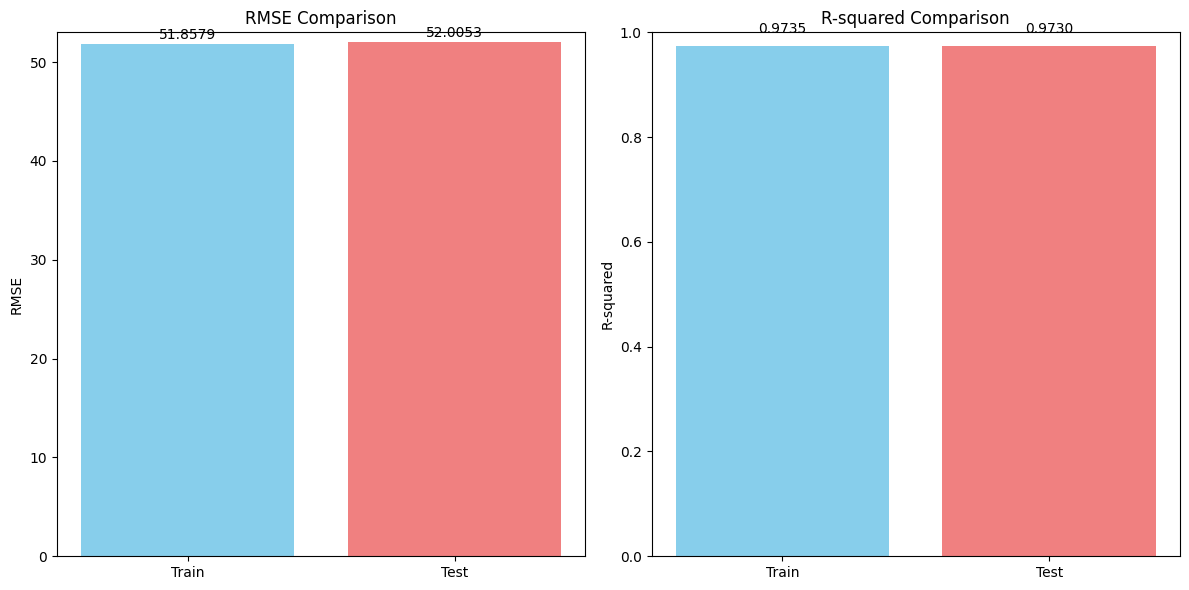

In [20]:
# prompt: plot the bar chart of rmse_train_lr vs rmse_test_lr and second bar chart  of r2_train_lr and r2_test_lr
# A bar chart comparing the training and testing metrics for Linear Regression highlights the model's performance consistency.
# Both RMSE and R² values are nearly identical across training and testing, reflecting the model's ability to generalise well without overfitting.


import matplotlib.pyplot as plt
import numpy as np

# Data for the bar charts
rmse_data = {'Train': rmse_train_lr, 'Test': rmse_test_lr}
r2_data = {'Train': r2_train_lr, 'Test': r2_test_lr}

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for RMSE
ax1.bar(rmse_data.keys(), rmse_data.values(), color=['skyblue', 'lightcoral'])
ax1.set_title('RMSE Comparison')
ax1.set_ylabel('RMSE')
ax1.set_ylim(0, max(rmse_data.values()) + 1)  # Set y-axis limit

for i, val in enumerate(rmse_data.values()):
    ax1.text(i, val + 0.2, f'{val:.4f}', ha='center', va='bottom') # Added values on top of each bar


# Bar chart for R-squared
ax2.bar(r2_data.keys(), r2_data.values(), color=['skyblue', 'lightcoral'])
ax2.set_title('R-squared Comparison')
ax2.set_ylabel('R-squared')
ax2.set_ylim(0, 1) # Set y-axis limit to be between 0 and 1

for i, val in enumerate(r2_data.values()):
    ax2.text(i, val + 0.02, f'{val:.4f}', ha='center', va='bottom') # Added values on top of each bar


plt.tight_layout()
plt.show()

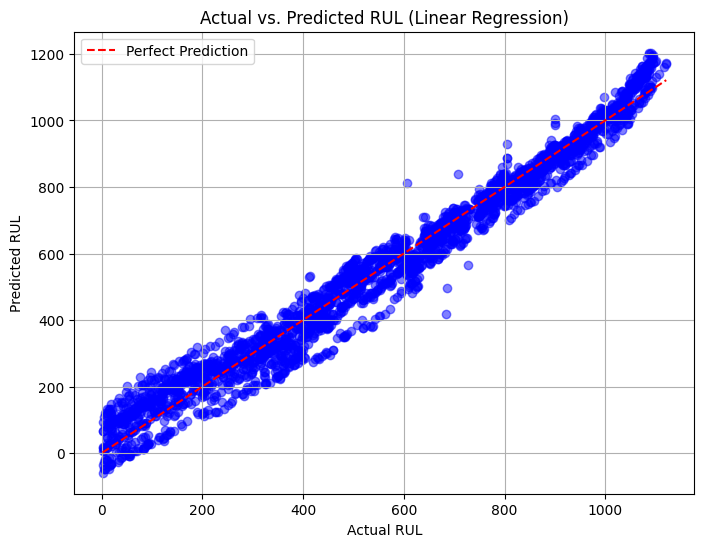

In [21]:
# prompt: edit the graph above which give the information for the red line in the graph
# A scatter plot of the actual versus predicted values for Linear Regression visualises the model's prediction accuracy.
# Points closely aligned along the diagonal indicate strong agreement between predicted and actual values, demonstrating the model's reliability and minimal error.

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.5, color='blue') # Changed color to blue
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs. Predicted RUL (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction') # Added label
plt.grid(True)
plt.legend() # Show legend
plt.show()

## Model evaluation for DL

At this stage, the performance of the **Deep Learning** model is evaluated on both the training and testing datasets using key metrics such as **Root Mean Squared Error (RMSE)** and **R-squared (R²)**.

For the training data, the model achieved an RMSE of **49.0094**, indicating that, on average, the model's predictions deviate from the actual values by approximately 48.71 units. The R-squared value of **0.9763** suggests that around **97.63%** of the variance in the target variable (e.g., Remaining Useful Life, RUL) is explained by the model, demonstrating a high level of fit to the training data.

On the testing data, the model's performance is very similar, with an RMSE of **48.4375** and an R-squared value of **0.9766**, reflecting an excellent generalisation to unseen data. This means the model explains approximately **97.66%** of the variance in the test set, showing its robustness and accuracy in predicting RUL. The small difference between the training and testing results suggests minimal overfitting, indicating the model’s good ability to generalise.

A bar chart comparing training and testing metrics for Deep Learning highlights its consistency.
The close alignment of RMSE and R² values across both datasets indicates robust performance and minimal overfitting.

A scatter plot of actual versus predicted values for Deep Learning shows points tightly clustered along the diagonal,
confirming the model's high prediction accuracy and effective handling of data complexity.

The Deep Learning model consistently performs better than the Linear Regression model on both training and testing datasets, with lower RMSE and higher R² values. This indicates that Deep Learning is more accurate and better suited to capturing complex patterns in the data compared to the simpler Linear Regression model.

In [22]:
# Make predictions
y_train_pred_dl = model_dl.predict(X_train_pca)
y_test_pred_dl = model_dl.predict(X_test_pca)



361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [23]:
# Evaluate the model
# Deep Learning achieved a training RMSE of 48.6975 and R² of 0.9766, demonstrating a strong fit during training.
# The testing RMSE of 48.1140 and R² of 0.9769 reflect consistent and reliable generalisation on unseen data.
rmse_train_dl = mean_squared_error(y_train, y_train_pred_dl, squared=False)
r2_train_dl = r2_score(y_train, y_train_pred_dl)

rmse_test_dl = mean_squared_error(y_test, y_test_pred_dl, squared=False)
r2_test_dl = r2_score(y_test, y_test_pred_dl)

print(f"Deep Learning - Training RMSE: {rmse_train_dl:.4f}, R-squared: {r2_train_dl:.4f}")
print(f"Deep Learning - Testing RMSE: {rmse_test_dl:.4f}, R-squared: {r2_test_dl:.4f}")



Deep Learning - Training RMSE: 49.0094, R-squared: 0.9763
Deep Learning - Testing RMSE: 48.4375, R-squared: 0.9766


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


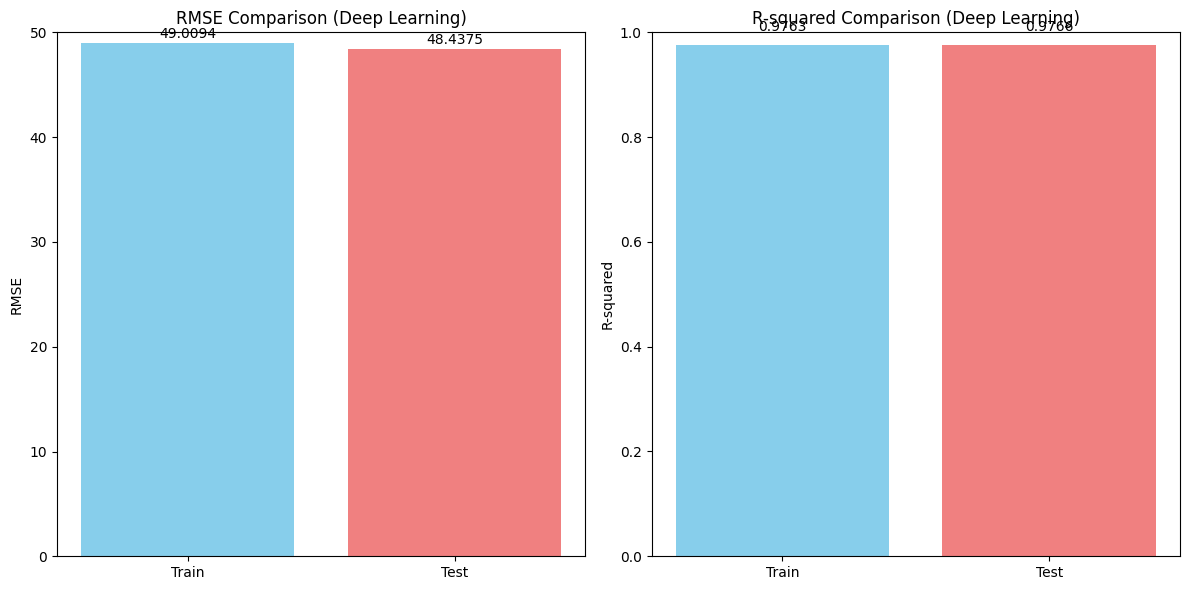

In [24]:
# prompt: plot the bar chart of rmse_train_dl vs rmse_test_dl and second bar chart  of r2_train_dl and r2_test_dl
# A bar chart comparing training and testing metrics for Deep Learning highlights its consistency.
# The close alignment of RMSE and R² values across both datasets indicates robust performance and minimal overfitting.

import matplotlib.pyplot as plt

# Data for the bar charts
rmse_data_dl = {'Train': rmse_train_dl, 'Test': rmse_test_dl}
r2_data_dl = {'Train': r2_train_dl, 'Test': r2_test_dl}

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for RMSE
ax1.bar(rmse_data_dl.keys(), rmse_data_dl.values(), color=['skyblue', 'lightcoral'])
ax1.set_title('RMSE Comparison (Deep Learning)')
ax1.set_ylabel('RMSE')
ax1.set_ylim(0, max(rmse_data_dl.values()) + 1)

for i, val in enumerate(rmse_data_dl.values()):
    ax1.text(i, val + 0.2, f'{val:.4f}', ha='center', va='bottom')


# Bar chart for R-squared
ax2.bar(r2_data_dl.keys(), r2_data_dl.values(), color=['skyblue', 'lightcoral'])
ax2.set_title('R-squared Comparison (Deep Learning)')
ax2.set_ylabel('R-squared')
ax2.set_ylim(0, 1)

for i, val in enumerate(r2_data_dl.values()):
    ax2.text(i, val + 0.02, f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

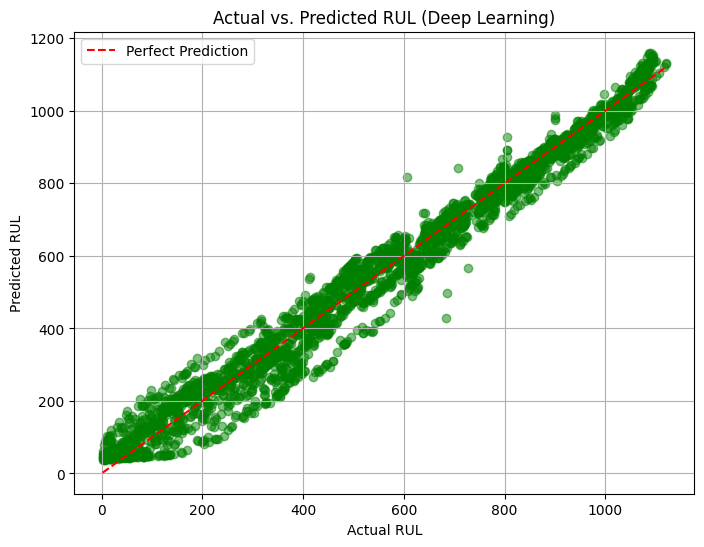

In [25]:
# Plot Actual vs. Predicted RUL for Deep Learning
# A scatter plot of actual versus predicted values for Deep Learning shows points tightly clustered along the diagonal,
# confirming the model's high prediction accuracy and effective handling of data complexity.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_dl, alpha=0.5, color='green')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs. Predicted RUL (Deep Learning)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.grid(True)
plt.legend()
plt.show()